# RidgeRegression e LogisticRegression

#### Realiza um gráfico (line plot) que permita visualizar o comportamento do custo em função do número de iterações.

In [1]:
import sys 
sys.path.insert(1, '/Users/danielalemos/si/src/si/io')
sys.path.insert(1, '/Users/danielalemos/si/src/si/linear_model')
sys.path.insert(1, '/Users/danielalemos/si/src/si/model_selection')
from logistic_regression import LogisticRegression
from ridge_regression import RidgeRegression
from csv_file import read_csv
from split import train_test_split

import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler

### Modelo RidgeRegression

In [2]:
cpu_path = '/Users/danielalemos/si/datasets/cpu.csv'
cpu = read_csv(cpu_path, sep = ',', features = True, label = True)

In [3]:
#normalize data
cpu.X = StandardScaler().fit_transform(cpu.X)

In [4]:
#split dataset
train_dataset, test_dataset = train_test_split(cpu, test_size = 0.3, random_state = 20)
test_dataset.y

array([ 45, 318, 138,  18,  36,  30, 277,  21,  66, 214,  22,  36,  45,
       106,  37,  27,  66, 307, 113, 269, 144,  24, 277, 140,  20,  34,
        22,  26, 105,  18,  16, 189,  42,  45,  77,  80, 214,  12,  29,
        53,  72,  11, 212, 141, 248, 465,  52,  50,  33, 100,  11,  22,
        26,  17, 144,  62,  20,  14,  33,  20,  12,   6])

In [5]:
ridge = RidgeRegression(max_iter=2000, use_adaptive_alpha = False)
ridge.fit(train_dataset)
predictions = ridge.predict(test_dataset)

Regular fit


In [6]:
ridge2 = RidgeRegression(max_iter=2000, use_adaptive_alpha = True)
ridge2.fit(train_dataset)
predictions2 = ridge2.predict(test_dataset)

Adaptive fit


In [7]:
#Informations with regular fit
print(f'Predictions with regular fit:\n{predictions}')
print(f'Score with regular fit: {ridge.score(test_dataset)}')
print(f'Cost with regular fit: {ridge.cost(test_dataset)}')

Predictions with regular fit:
[ 70.89075551 299.53489581 121.35145259 -43.92926266 -10.29748103
  35.5842328  239.10487422  -3.11401658  92.9317446  174.96384289
  10.03040272 -12.42955137  -2.42504673 185.46015448  -1.42271341
  -9.9897424   80.7636453  478.28923993  95.37631053 274.6126249
  96.17911308 -37.63596197 289.15099319 292.93929736 -43.89236001
  -1.98781544  -0.5660267   13.31136706  33.11094178 -21.7109707
 -30.03573183 209.66584324  51.27146181  15.70406758 -24.89518657
  61.54784699 175.85074666 -40.07070672  -9.08264521  33.89417913
  32.06883983 -37.17419408 243.50957933 209.66584324 289.57256363
 389.81770411  17.97494139 -22.63667835  34.24070916  95.694301
 -39.42179646 -19.76863913 -35.87684712 -28.07408666 135.09047929
  29.29791967 -13.12611192 -36.92046251  39.47189376 -22.18883637
 -37.5197202  -44.66936651]
Score with regular fit: 1316.6049240618975
Cost with regular fit: 1382.2527265541228


In [8]:
#Informations with adaptive fit
print(f'Predictions with adaptive fit:\n{predictions2}')
print(f'Score with adaptive fit: {ridge2.score(test_dataset)}')
print(f'Cost with adaptive fit: {ridge2.cost(test_dataset)}')

Predictions with adaptive fit:
[ 70.91711036 299.5752368  121.38091728 -43.89046994 -10.28875961
  35.60375684 239.14652405  -3.0936041   92.95861213 174.99331602
  10.05248887 -12.40423811  -2.39825333 185.48412281  -1.37787857
  -9.97379861  80.7952137  478.271577    95.39774038 274.65396654
  96.20189555 -37.61543225 289.1913215  292.97403243 -43.8509229
  -1.96614817  -0.54831603  13.3316251   33.12700569 -21.66535628
 -30.01132826 209.71298559  51.29957675  15.72316583 -24.86890071
  61.57570723 175.87796858 -40.05036319  -9.06364237  33.92663423
  32.09315978 -37.15327406 243.51993456 209.71298559 289.60702146
 389.8680916   17.99852858 -22.61706164  34.25669368  95.71835645
 -39.37860406 -19.74449517 -35.86277585 -28.05680276 135.12002004
  29.32022452 -13.08126261 -36.89978975  39.49270754 -22.14538496
 -37.50317416 -44.64941341]
Score with adaptive fit: 1316.0039829694995
Cost with adaptive fit: 1381.6629931165799


Text(0.5, 1.0, 'Cost function with Regular Fit')

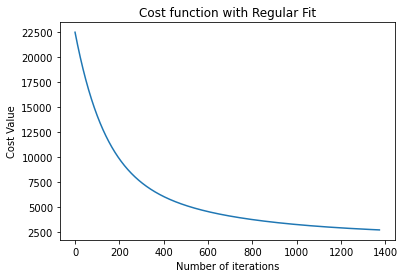

In [9]:
#Plot with regular fit
cost_hist = ridge.cost_history
cost_value = list(cost_hist.keys()) #y 
iterations = list(cost_hist.values()) #x
plt.plot(cost_value, iterations)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost function with Regular Fit')

Text(0.5, 1.0, 'Cost function with Adaptive Fit')

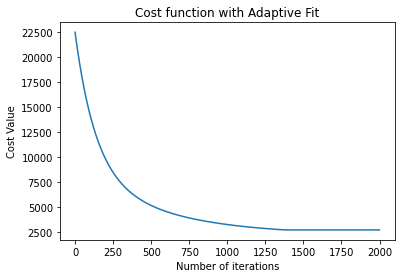

In [10]:
#Plot with adaptive fit
cost_hist = ridge2.cost_history
cost_value = list(cost_hist.keys()) #y 
iterations = list(cost_hist.values()) #x
plt.plot(cost_value, iterations)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost function with Adaptive Fit')

### Modelo LogisticRegression

In [11]:
breast_bin_path = '/Users/danielalemos/si/datasets/breast-bin.csv'
breast_bin = read_csv(breast_bin_path, sep = ',', features = False, label = True)

In [12]:
#normalize data
breast_bin.X = StandardScaler().fit_transform(breast_bin.X)

In [13]:
#split dataset
train_dataset, test_dataset = train_test_split(breast_bin, test_size = 0.3, random_state = 20)
test_dataset.y

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0.])

In [14]:
log_reg = LogisticRegression(max_iter = 2000, use_adaptive_alpha = False)
log_reg.fit(train_dataset)
predictions = log_reg.predict(test_dataset)

In [15]:
log_reg2 = LogisticRegression(max_iter = 2000, use_adaptive_alpha = True)
log_reg2.fit(train_dataset)
predictions2 = log_reg2.predict(test_dataset)

In [16]:
#Informations with regular fit
print(f'Predictions with regular fit:\n{predictions}')
print(f'Score with regular fit: {log_reg.score(test_dataset)}')
print(f'Cost with regular fit: {log_reg.cost(test_dataset)}')

Predictions with regular fit:
[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
Score with regular fit: 0.9712918660287081
Cost with regular fit: 0.24361041827854127


In [17]:
#Informations with adaptive fit
print(f'Predictions with adaptive fit:\n{predictions2}')
print(f'Score with adaptive fit: {log_reg2.score(test_dataset)}')
print(f'Cost with adaptive fit: {log_reg2.cost(test_dataset)}')

Predictions with adaptive fit:
[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
Score with adaptive fit: 0.9712918660287081
Cost with adaptive fit: 0.24351077938949975


Text(0.5, 1.0, 'Cost function with Regular Fit')

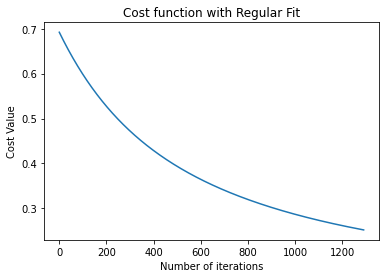

In [18]:
#Plot with regular fit
cost_hist = log_reg.cost_history
cost_value = list(cost_hist.keys()) #y 
iterations = list(cost_hist.values()) #x
plt.plot(cost_value, iterations)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost function with Regular Fit')

Text(0.5, 1.0, 'Cost function with Adaptive Fit')

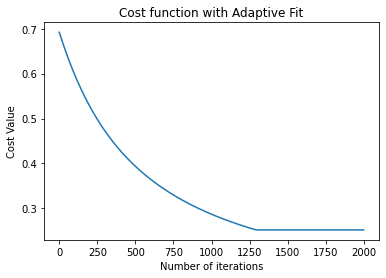

In [19]:
#Plot with adaptive fit
cost_hist = log_reg2.cost_history
cost_value = list(cost_hist.keys()) #y 
iterations = list(cost_hist.values()) #x
plt.plot(cost_value, iterations)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost function with Adaptive Fit')